In [3]:
import scipy.special
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [4]:
file_path = './data/assignmentImageDenoising_phantom.mat'
mat = scipy.io.loadmat(file_path)

In [5]:
print(mat.keys())
Noisy = mat['imageNoisy']
Original = mat['imageNoiseless']
print(f"header: {mat['__header__']}")
print(f"version: {mat['__version__']}")
print(f"globals: {mat['__globals__']}")
print(f"Noisy.shape: {Noisy.shape}")
print(f"Original.shape: {Original.shape}")

dict_keys(['__header__', '__version__', '__globals__', 'imageNoiseless', 'imageNoisy'])
header: b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Wed Jan 27 00:08:21 2021'
version: 1.0
globals: []
Noisy.shape: (256, 256)
Original.shape: (256, 256)


Figure(640x480)


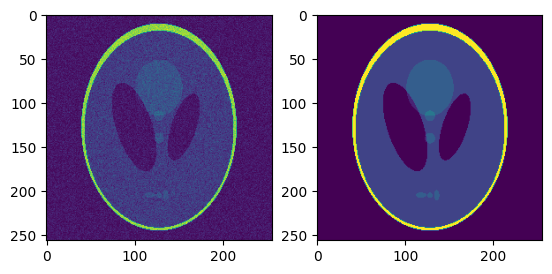

In [6]:
fig, axs = plt.subplots(1, 2)

axs[0].imshow(Noisy)
# axs[0].title('Noisy Brain MRI')
axs[1].imshow(Original)
# axs[1].title('Original Brain MRI')
print(fig)

In [7]:
print(Noisy.shape)
print(Original.shape)
# print(Noisy.dtype)

(256, 256)
(256, 256)


In [8]:
# Noise Model
# We have picked Rician Noise model here
def noise_model(x, y, alpha):
    beta = 1 - alpha
    noise = np.log(beta*y) - beta*(y**2 + x**2)/2 + np.log(scipy.special.i0(beta*y*x))
    del_noise = beta*x - (scipy.special.i1(beta*y*x)/scipy.special.i0(beta*y*x))*beta*y
    return noise, del_noise

In [9]:
# Quadratic prior
def quadratic_prior(x, y):
    quad_prior = (np.abs(x-y))**2
    del_quad_prior = 2 * np.abs(x-y)
    return quad_prior, del_quad_prior

# Discontinuity-adaptive Huber prior
def adaptive_huber(x, y, gamma):
    u = np.abs(x-y)
    if u <= gamma:
        huber = 0.5 * u**2
        del_huber = u
    else:
        huber = gamma * u - 0.5 * gamma**2
        del_huber = gamma
    
    return huber, del_huber

# Discontinuity-adaptive prior
def disco_adaptive(x, y, gamma):
    u = np.abs(x-y)
    disco_adap = gamma*u - gamma**2 * np.log(1 + u/gamma)
    del_disco_adap = gamma - gamma/(gamma + u)

    return disco_adap, del_disco_adap

In [10]:
# Calculating the prior for entire image:
def calc_prior(x, y, gamma=None):
    # Will write code here
    pass

# Calculating the posterior:
def calc_posterior(x, y, gamma=None):
    # Will write code here
    pass

In [11]:
# Function for RRMSE:
def rrmse(A,B):
    #Here A and B is noiseless image and noisy image
    num=np.sum((np.abs(A)-np.abs(B))**2)
    den=np.sum(np.abs(A)**2)
    rrmse=np.sqrt(num/den)
    return rrmse 

In [12]:
# Calculate RRMSE for the initial Noisy and Original image here
print(rrmse(Original, Noisy))

0.29857915712437444


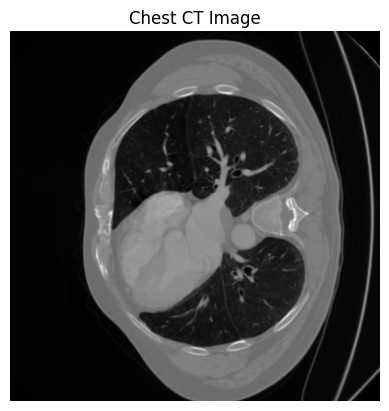

In [13]:
file_path = './data/assignmentImageDenoising_chestCT.mat'

with h5py.File(file_path, 'r') as mat:
    dataset_name = list(mat.keys())[0]  # Assuming first key is the image
    image_data = np.array(mat[dataset_name])  # Convert to NumPy array
plt.imshow(image_data, cmap='gray')
plt.axis('off') 
plt.title("Chest CT Image")
plt.show()

In [14]:
print(image_data.shape)

(512, 512)


In [15]:
#Question 4
def patches(image, size):
    patches=[]
    height, width=image.shape
    for i in range(0, height-size[0]):
        for j in range(0, width-size[1]):
             patch = image[i:i + size[0], j:j + size[1]].flatten()
             patches.append(patch)
    return np.array(patches)

In [16]:
ix=patches(image_data, (8,8))
print(ix.shape)

(254016, 64)
